In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#show plots inline
%matplotlib inline
import statsmodels.api as sm
from scipy import stats

In [9]:
students = pd.read_csv("CumGPAByCount.csv",header=0,sep=',')
students = students.drop('entryId',1)

In [10]:
students.head(1)

,cnt,CUM_GPA
0,1,1.94


In [11]:
students.mean()

cnt        2.087050
CUM_GPA    3.461055
dtype: float64

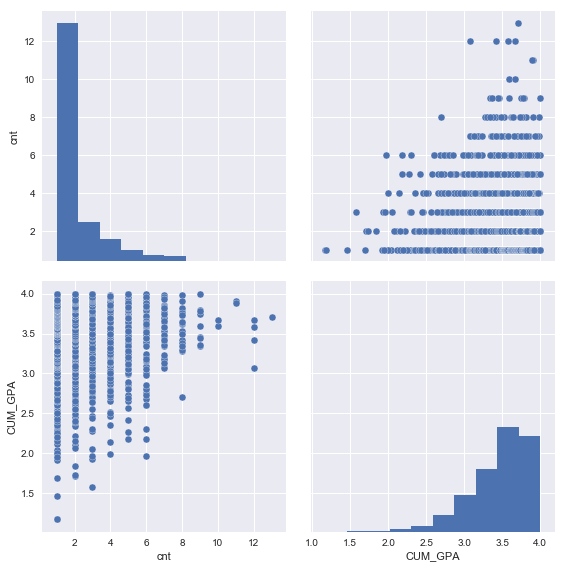

In [12]:
sns.pairplot(students, size=4)
plt.show()

In [13]:

X = sm.add_constant(students['cnt'])
model = sm.OLS(students['CUM_GPA'],X ).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CUM_GPA   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.987
Date:                Wed, 11 Oct 2017   Prob (F-statistic):            0.00274
Time:                        15:54:25   Log-Likelihood:                -1562.1
No. Observations:                3251   AIC:                             3128.
Df Residuals:                    3249   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4332      0.012    297.213      0.000       3.411       3.456
cnt            0.0133      0.004      2.998      0.003       0.005       0.022
==============================================================================
Omnibus:                      684.687   Durbin-Watson:                   0.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1414.456
Skew:                          -1.232   Prob(JB):                    7.16e-308
Kurtosis:                       5.091   Cond. No.                         4.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

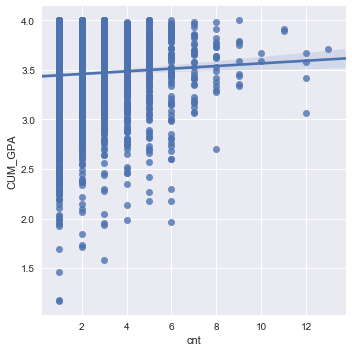

In [14]:
regPlot = sns.lmplot(x='cnt',y='CUM_GPA',data=students,fit_reg=True) 

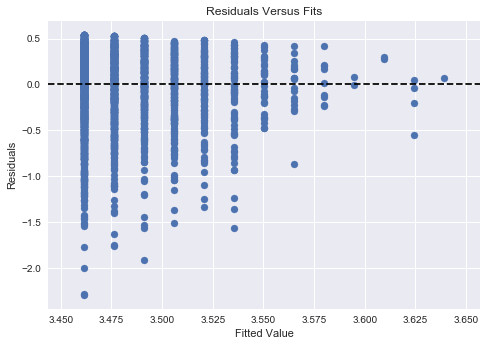

In [15]:
#residPlot = sns.residplot(students['cnt'],students['CUM_GPA'])

fitted = 3.4467 + 0.0148*students['cnt'] # This just needs to be whatever the linear regrsssion equation is
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1]) 
axes.axhline(color="black", ls="--") # This creates a horizon line (like abline in R)
axes.set_xlabel('Fitted Value')
axes.set_ylabel('Residuals')
axes.set_title('Residuals Versus Fits')
axes.scatter(fitted, students['CUM_GPA']  - fitted, marker = "o")

(array([    2.,     5.,    10.,    27.,    63.,   176.,   371.,   651.,
         1061.,   885.]),
 array([-5.81708916, -5.09396072, -4.37083227, -3.64770383, -2.92457539,
        -2.20144694, -1.4783185 , -0.75519006, -0.03206162,  0.69106683,
         1.41419527]),
 <a list of 10 Patch objects>)

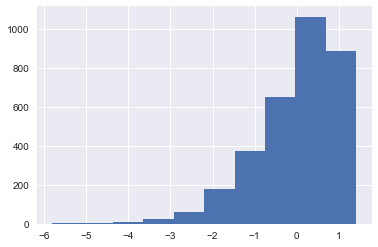

In [16]:
plt.hist(model.resid_pearson)

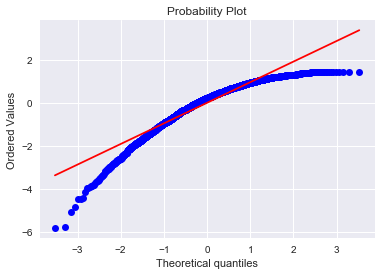

In [17]:
prob = stats.probplot(model.resid_pearson,plot=plt)

In [18]:

from statsmodels.stats.outliers_influence import summary_table
from statsmodels.sandbox.regression.predstd import wls_prediction_std

re = sm.OLS(students['CUM_GPA'], students['cnt']).fit()
prstd, iv_l, iv_u = wls_prediction_std(re)


st, data, ss2 = summary_table(re, alpha=0.05)

fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

# check we got the right things
print(np.max(np.abs(re.fittedvalues - fittedvalues)))
print(np.max(np.abs(iv_l - predict_ci_low)))
print(np.max(np.abs(iv_u - predict_ci_upp)))

plt.plot(x, y, 'o')
plt.plot(x, fittedvalues, '-', lw=2)
plt.plot(x, predict_ci_low, 'r--', lw=2)
plt.plot(x, predict_ci_upp, 'r--', lw=2)
plt.plot(x, predict_mean_ci_low, 'r--', lw=2)
plt.plot(x, predict_mean_ci_upp, 'r--', lw=2)
plt.show()

0.0
0.0
0.0


NameError: name 'x' is not defined